In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 11
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_flat+slowincrease'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

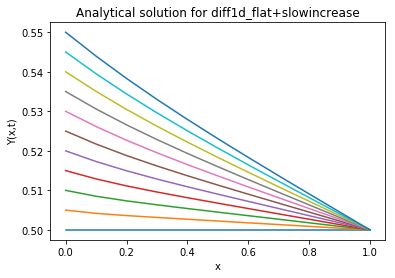

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
# plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.002510
         Iterations: 2496
         Function evaluations: 2642
         Gradient evaluations: 2642
7min 37s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.002510272281386588
 hess_inv: array([[ 9.69097068e+03, -5.56976053e+03, -1.99878412e+02, ...,
         1.72708526e+04, -1.14216300e+04,  5.92527028e+03],
       [-5.56976051e+03,  1.82606004e+04,  1.25459355e+04, ...,
        -5.43862847e+02, -2.65504957e+04,  6.95634900e+03],
       [-1.99878496e+02,  1.25459357e+04,  2.75060577e+04, ...,
         4.55331382e+04, -8.03377617e+04,  3.69964023e+04],
       ...,
       [ 1.72708531e+04, -5.43862430e+02,  4.55331397e+04, ...,
         2.27772843e+05, -2.42731680e+05,  1.12873461e+05],
       [-1.14216308e+04, -2.65504961e+04, -8.03377634e+04, ...,
        -2.42731680e+05,  3.90842552e+05, -1.77899178e+05],
       [ 5.92527060e+03,  6.95634922e+03,  3.69964030e+04, ...,
         1.128734

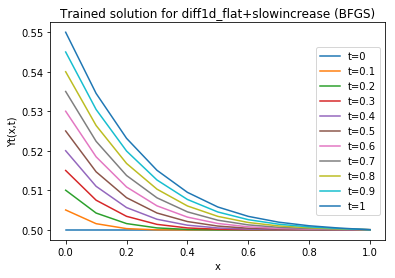

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

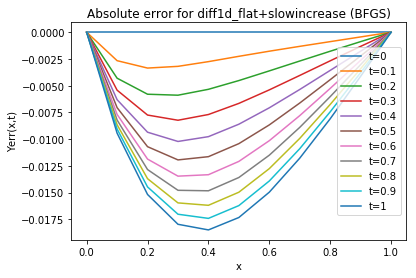

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

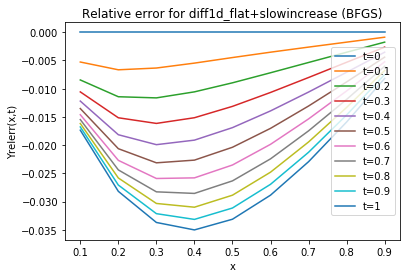

In [9]:
Yrelerr1 = (Yt1[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-6)

In [10]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

Optimization terminated successfully.
         Current function value: 0.002504
         Iterations: 3549
         Function evaluations: 3747
         Gradient evaluations: 3747
10min 40s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.0025041136433039666
 hess_inv: array([[ 3.35306780e+04, -2.10624657e+03,  4.13157198e+04, ...,
         2.62276278e+04, -1.12455102e+05,  5.40560481e+04],
       [-2.10624679e+03,  4.45138711e+05,  2.12203708e+05, ...,
        -8.12068626e+05,  1.13719758e+06, -5.14443965e+05],
       [ 4.13157161e+04,  2.12203706e+05,  6.27037462e+05, ...,
        -7.11845941e+05,  8.95520265e+05, -2.55755131e+05],
       ...,
       [ 2.62276314e+04, -8.12068627e+05, -7.11845919e+05, ...,
         2.74044282e+06, -3.90835353e+06,  1.61731957e+06],
       [-1.12455099e+05,  1.13719751e+06,  8.95520168e+05, ...,
        -3.90835332e+06,  6.41869629e+06, -2.82321142e+06],
       [ 5.40560452e+04, -5.14443920e+05, -2.55755070e+05, ...,
         1.6173

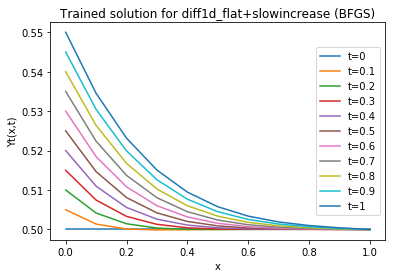

In [11]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

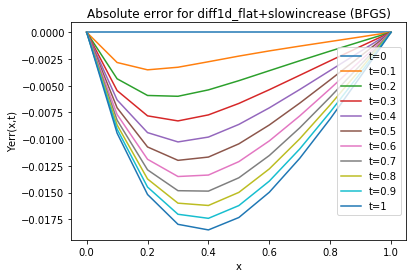

In [12]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

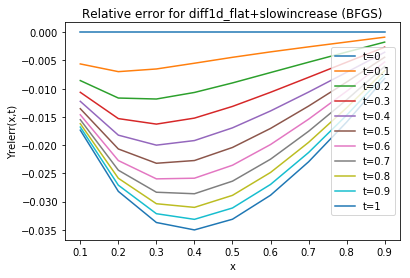

In [13]:
Yrelerr2 = (Yt2[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-8)

In [6]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

         Current function value: 0.002502
         Iterations: 8000
         Function evaluations: 8546
         Gradient evaluations: 8546
24min 38s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.002501629107672817
 hess_inv: array([[ 3.49377263e+04,  2.59553220e+04,  5.96652842e+04, ...,
         1.55768986e+05, -4.05843474e+05, -8.69833838e+03],
       [ 2.59551317e+04,  3.55025744e+05,  1.93801456e+05, ...,
        -6.65898701e+05,  1.53106801e+06,  8.60943724e+04],
       [ 5.96648646e+04,  1.93803793e+05,  2.39781686e+05, ...,
         5.51922376e+04, -2.83751684e+05,  2.85489847e+04],
       ...,
       [ 1.55766295e+05, -6.65902887e+05,  5.51963469e+04, ...,
         6.46626734e+06, -1.68519139e+07, -4.37216523e+05],
       [-4.05826500e+05,  1.53112142e+06, -2.83726118e+05, ...,
        -1.68519935e+07,  4.92126312e+07,  1.12756490e+06],
       [-8.69794210e+03,  8.60961256e+04,  2.85495518e+04, ...,
        -4.37212917e+05,  1.12753981e+06,  1.09003705e

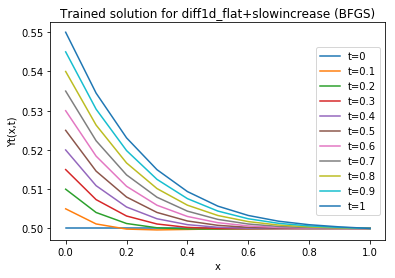

In [7]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

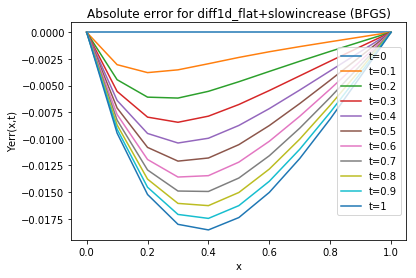

In [8]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

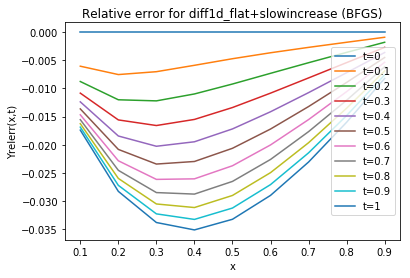

In [9]:
Yrelerr3 = (Yt3[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-8, maxiter=16000)

In [10]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
options['maxiter'] = 16000
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

         Current function value: 0.002501
         Iterations: 11656
         Function evaluations: 12551
         Gradient evaluations: 12539
36min 40s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.0025014825424894568
 hess_inv: array([[ 1.09559641e+05,  1.62466601e+03,  7.88740544e+04, ...,
        -8.39640208e+06,  5.93912558e+06, -2.65240012e+04],
       [ 1.68270474e+03,  5.04988539e+05,  1.17725880e+05, ...,
         7.78240669e+06, -4.04359219e+06,  2.35115313e+05],
       [ 7.88936180e+04,  1.17745565e+05,  1.50466853e+05, ...,
        -3.85131360e+06,  2.83878620e+06, -3.56675489e+04],
       ...,
       [-8.38404670e+06,  7.74043830e+06, -3.85393173e+06, ...,
         1.44499629e+09, -1.07943929e+09, -4.62450256e+06],
       [ 5.92817389e+06, -4.00650894e+06,  2.84109780e+06, ...,
        -1.07885840e+09,  8.22703754e+08,  5.83982361e+06],
       [-2.67455002e+04,  2.35613467e+05, -3.57425329e+04, ...,
        -4.56486738e+06,  5.79659811e+06,  4.29206

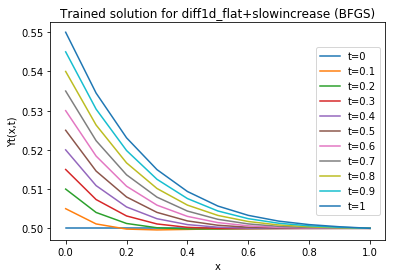

In [12]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

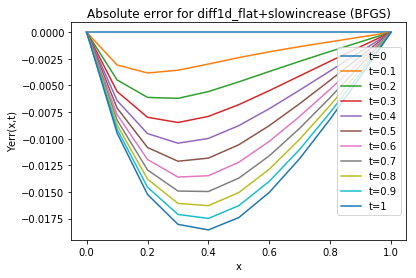

In [13]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

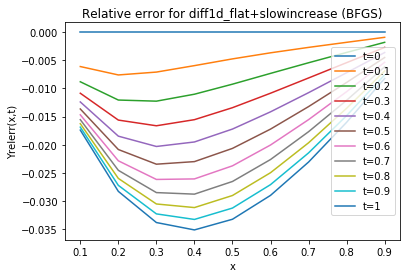

In [14]:
Yrelerr4 = (Yt4[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));